### Time Series Analysis

Dataset: The US Economic Data (Quartely)

Source: FRED-QD (Quarterly Database for Macroeconomic Research)

Columns: Quarter, Consumption, Income, Production, Savings, and Unemployment

This project includes univariate and multivariate time series analysis using ARIMA and VAR models on a quarterly US economic dataset in Python to forecast indicators four periods ahead. 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [3]:
from sklearn.metrics import mean_absolute_percentage_error

#### Data Loading

In [4]:
df=pd.read_csv('us_data.csv',sep='\t')
df

,Quarter,Consumption,Income,Production,Savings,Unemployment
1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...,...
194,2018 Q2,0.983112,0.661825,1.117424,-2.723974,0.0
195,2018 Q3,0.853181,0.806271,1.256722,-0.085686,-0.3
196,2018 Q4,0.356512,0.695142,0.948148,5.031337,0.2
197,2019 Q1,0.282885,1.100753,-0.488206,9.760287,-0.1


In [5]:
df.columns

Index(['Quarter', 'Consumption', 'Income', 'Production', 'Savings',
       'Unemployment'],
      dtype='object')

In [6]:
df['date']=pd.to_datetime(df['Quarter'].str.replace(' ',''))
df.set_index('date',inplace=True)
df.index.freq='QS-JAN'
df.drop('Quarter',axis=1,inplace=True)
df

,Consumption,Income,Production,Savings,Unemployment
date,,,,,
1970-01-01,0.618566,1.044801,-2.452486,5.299014,0.9
1970-04-01,0.451984,1.225647,-0.551459,7.789894,0.5
1970-07-01,0.872872,1.585154,-0.358652,7.403984,0.5
1970-10-01,-0.271848,-0.239545,-2.185691,1.169898,0.7
1971-01-01,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...
2018-04-01,0.983112,0.661825,1.117424,-2.723974,0.0
2018-07-01,0.853181,0.806271,1.256722,-0.085686,-0.3
2018-10-01,0.356512,0.695142,0.948148,5.031337,0.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 1970-01-01 to 2019-04-01
Freq: QS-JAN
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Consumption   198 non-null    float64
 1   Income        198 non-null    float64
 2   Production    198 non-null    float64
 3   Savings       198 non-null    float64
 4   Unemployment  198 non-null    float64
dtypes: float64(5)
memory usage: 9.3 KB


In [8]:
df.to_csv('usdata.csv')

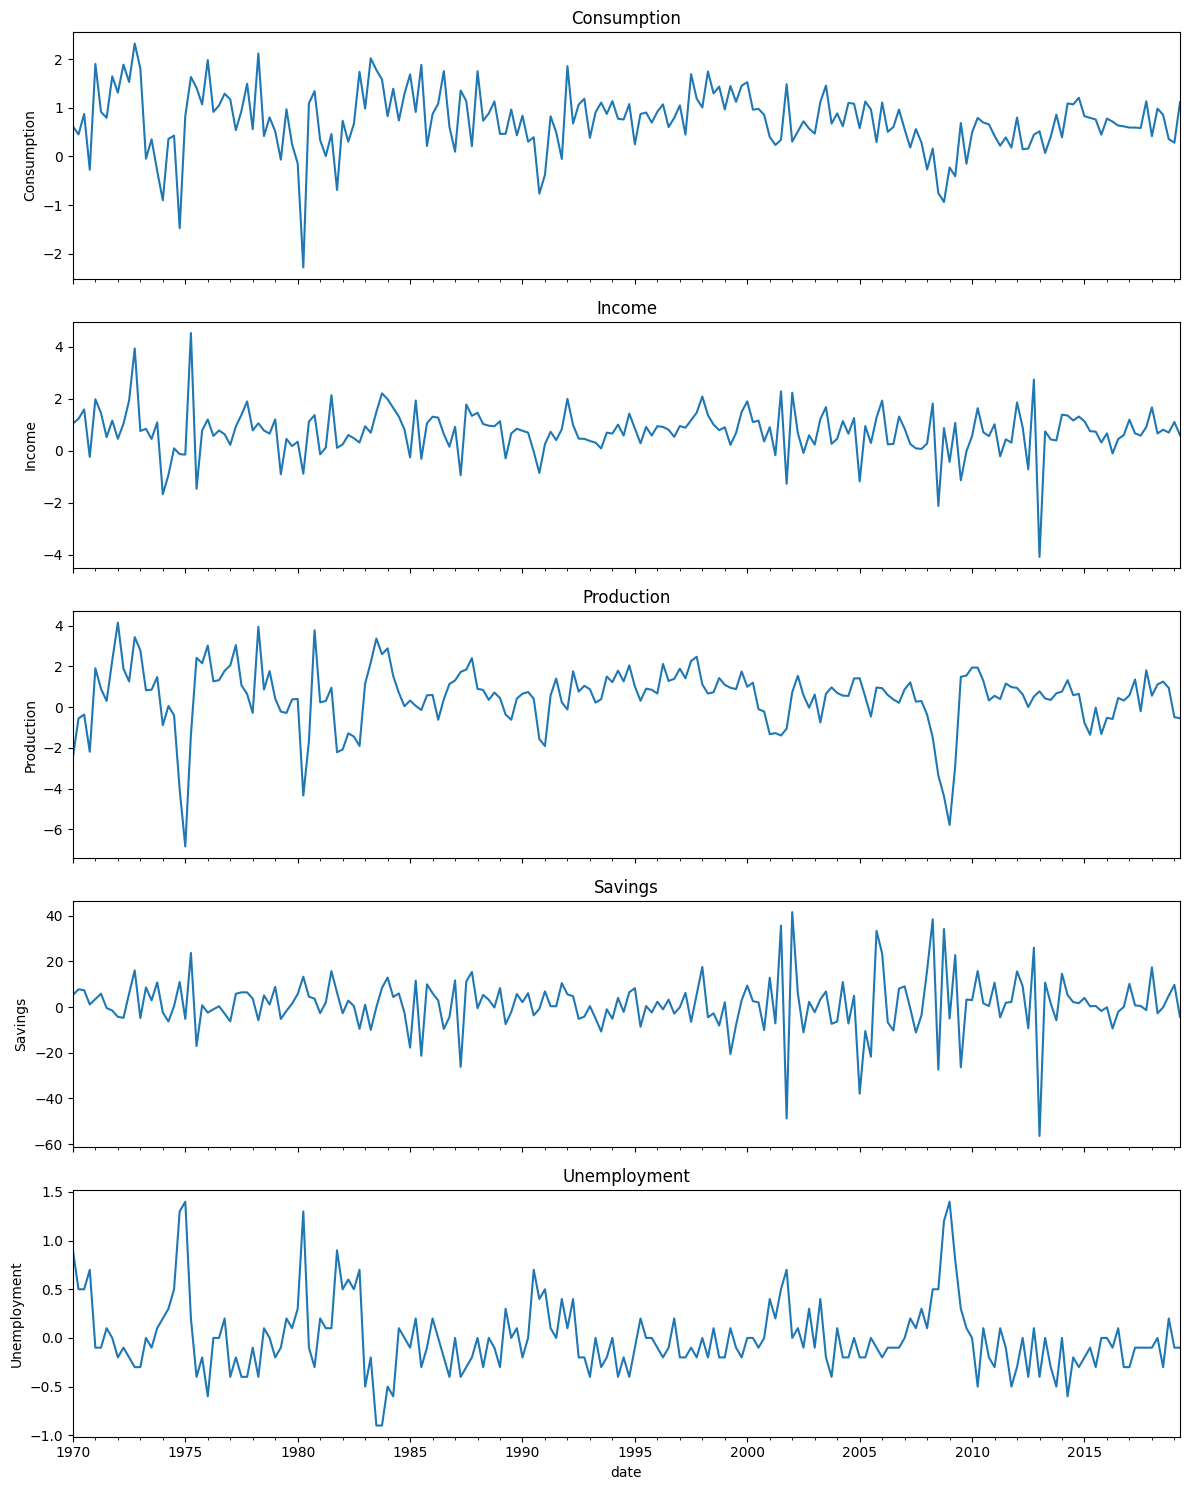

In [9]:
import matplotlib.pyplot as plt

# Plot each time series in the dataset
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 15), sharex=True)

for i, column in enumerate(df.columns):
    df[column].plot(ax=axes[i], title=column)
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

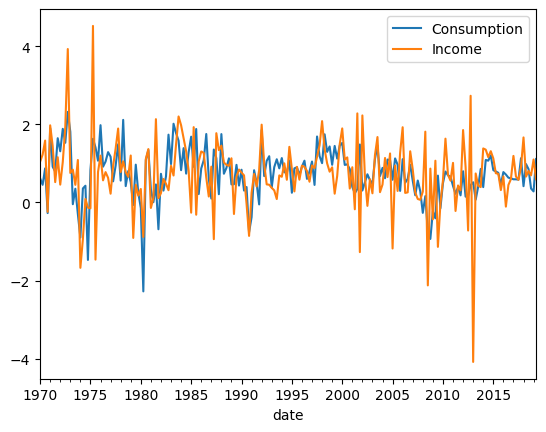

In [10]:
df[['Consumption','Income']].plot(legend=True)

#### Time Series Decomposition:

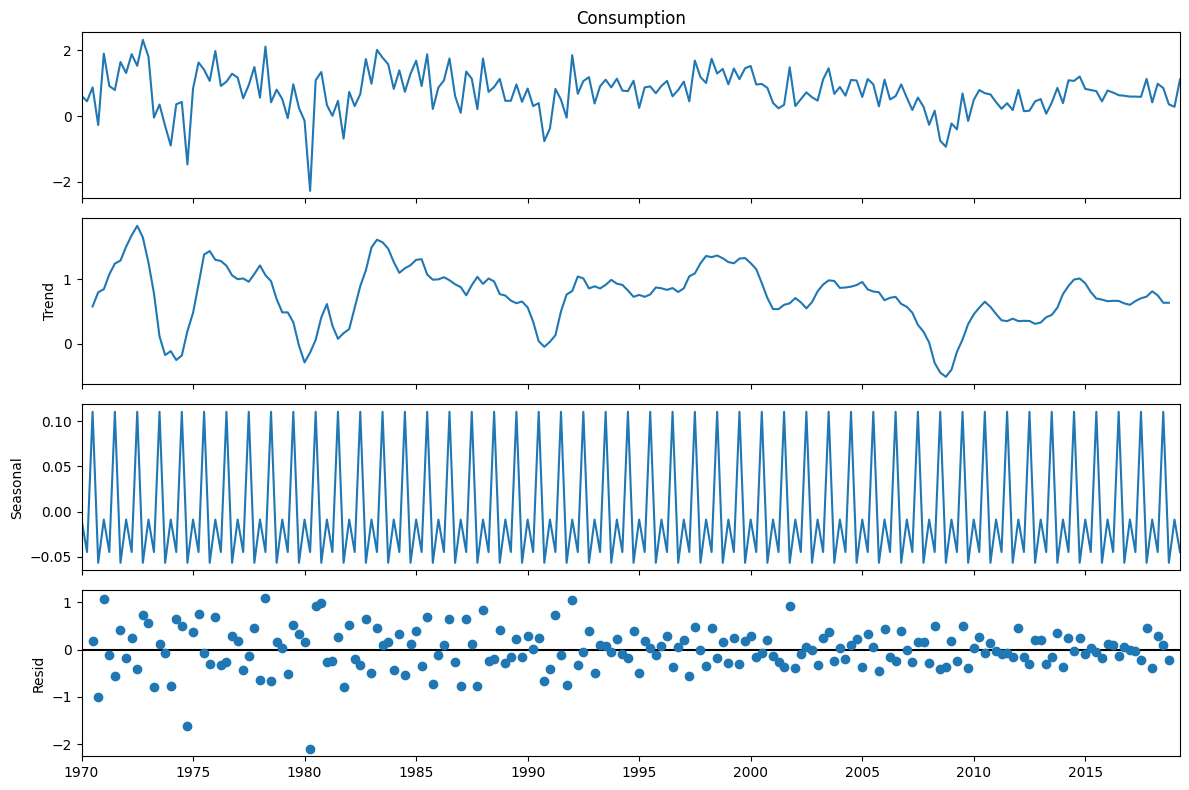

In [11]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['Consumption'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

  - Trend: Long-term movement in the time series.
  - Seasonality: Repeating short-term cycle in the series.
  - Residual: Random noise in the data.

The data contains seasonal component
 - The "Consumption" graph displays fluctuating data around a mean value, indicating the original dataset.
 - The "Trend" graph shows a smoother line representing the long-term movement in the data without seasonal effects.
 - The "Seasonal" graph exhibits a regular pattern of peaks and troughs, indicating a strong seasonal component in the data.
 - The "Residual" graph represents random variation or noise not accounted for by the trend or seasonal components.

#### Stationarity check

Performing a stationarity check using statistical tests like the Augmented Dickey-Fuller (ADF) test

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller(df['Consumption'])

adf_output = {
    'Test Statistic': result[0],
    'p-value': result[1],
    'Lags Used': result[2],
    'Number of Observations Used': result[3],
    'Critical Values': result[4],
    'IC Best Value': result[5]
}
adf_output

{'Test Statistic': -4.610123144902199,
 'p-value': 0.00012373240927130775,
 'Lags Used': 2,
 'Number of Observations Used': 195,
 'Critical Values': {'1%': -3.464337030867007,
  '5%': -2.876478799035722,
  '10%': -2.574733103221565},
 'IC Best Value': 306.84324181648594}

In [14]:
result = adfuller(df['Income'])

adf_output = {
    'Test Statistic': result[0],
    'p-value': result[1],
    'Lags Used': result[2],
    'Number of Observations Used': result[3],
    'Critical Values': result[4],
    'IC Best Value': result[5]
}
adf_output

{'Test Statistic': -6.765613418127397,
 'p-value': 2.7220594688380146e-09,
 'Lags Used': 4,
 'Number of Observations Used': 193,
 'Critical Values': {'1%': -3.4646940755442612,
  '5%': -2.8766348847254934,
  '10%': -2.5748163958763994},
 'IC Best Value': 469.11064516885546}

The ADF statistics are lower than the critical values and the p-values are significantly lower 0.05, we reject the null hypothesis of non-stationarity. The original time series is stationary.

The results of the Dickey-Fuller tests suggest that both "Consumption" and "Income" time series are stationary:

 - Consumption: The test statistic is -4.610, which is lower than the 1% critical value of -3.464, indicating that we can reject the null hypothesis of non-stationarity at a 99% confidence level.

 - Income: The test statistic is -6.766, also lower than the 1% critical value of -3.465, allowing us to reject the null hypothesis of non-stationarity at a 99% confidence level.

### Model Identification

In [15]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [16]:
auto_arima(df['Consumption'], seasonal=True, m=4, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=353.783, Time=2.78 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=386.843, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=368.539, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=373.725, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=555.010, Time=0.09 sec
 ARIMA(2,0,2)(0,0,1)[4] intercept   : AIC=352.987, Time=1.08 sec
 ARIMA(2,0,2)(0,0,0)[4] intercept   : AIC=353.039, Time=0.81 sec
 ARIMA(2,0,2)(0,0,2)[4] intercept   : AIC=352.930, Time=2.41 sec
 ARIMA(2,0,2)(1,0,2)[4] intercept   : AIC=357.138, Time=2.61 sec
 ARIMA(1,0,2)(0,0,2)[4] intercept   : AIC=353.366, Time=1.23 sec
 ARIMA(2,0,1)(0,0,2)[4] intercept   : AIC=354.652, Time=1.14 sec
 ARIMA(3,0,2)(0,0,2)[4] intercept   : AIC=352.977, Time=2.47 sec
 ARIMA(2,0,3)(0,0,2)[4] intercept   : AIC=353.049, Time=2.36 sec
 ARIMA(1,0,1)(0,0,2)[4] intercept   : AIC=354.314, Time=2.59 sec
 ARIMA(1,0,3)(0,0,2)[4] intercept   : AIC=351.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  198
Model:             SARIMAX(1, 0, 3)x(0, 0, [1, 2], 4)   Log Likelihood                -167.526
Date:                                Wed, 19 Jun 2024   AIC                            351.053
Time:                                        11:24:25   BIC                            377.359
Sample:                                    01-01-1970   HQIC                           361.701
                                         - 04-01-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2437      0.099      2.468      0.014       0.050       0.437
ar.L1          0.6710      0.135      4.986      0.000       0.407       0.935
ma.L1         -0.4657      0.146     -3.195      0.001      -0.751      -0.180
ma.L2          0.0957      0.068      1.401      0.161      -0.038       0.230
ma.L3          0.1832      0.076      2.399      0.016       0.034       0.333
ma.S.L4       -0.1049      0.096     -1.096      0.273      -0.293       0.083
ma.S.L8       -0.1206      0.074     -1.638      0.101      -0.265       0.024
sigma2         0.3171      0.027     11.854      0.000       0.265       0.370
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
auto_arima(df['Income'], seasonal=True, m=4, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=523.918, Time=2.47 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=523.347, Time=0.18 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=523.941, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=524.693, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=621.381, Time=0.09 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=525.125, Time=0.18 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=525.116, Time=0.13 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=522.309, Time=0.27 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=523.926, Time=0.23 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=inf, Time=2.10 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : AIC=520.383, Time=0.30 sec
 ARIMA(2,0,0)(1,0,0)[4] intercept   : AIC=521.616, Time=0.46 sec
 ARIMA(2,0,0)(0,0,1)[4] intercept   : AIC=521.552, Time=0.31 sec
 ARIMA(2,0,0)(1,0,1)[4] intercept   : AIC=inf, Time=1.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  198
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -256.191
Date:                Wed, 19 Jun 2024   AIC                            520.383
Time:                        11:24:38   BIC                            533.536
Sample:                    01-01-1970   HQIC                           525.707
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7040      0.100      7.038      0.000       0.508       0.900
ar.L1         -0.1057      0.059     -1.776      0.076      -0.222       0.011
ar.L2          0.1397      0.083      1.680      0.093      -0.023       0.303
sigma2         0.7785      0.048     16.137      0.000       0.684       0.873
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               197.78
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.28
Prob(H) (two-sided):                  0.42   Kurtosis:                         7.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
auto_arima(df['Production'], seasonal=True, m=4, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=654.177, Time=0.95 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=731.058, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=652.922, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=658.638, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=750.017, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=650.970, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AIC=652.864, Time=0.18 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=641.122, Time=0.50 sec
 ARIMA(1,0,0)(2,0,1)[4] intercept   : AIC=632.836, Time=0.36 sec
 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=640.902, Time=0.23 sec
 ARIMA(1,0,0)(2,0,2)[4] intercept   : AIC=634.672, Time=0.73 sec
 ARIMA(1,0,0)(1,0,2)[4] intercept   : AIC=634.660, Time=0.41 sec
 ARIMA(0,0,0)(2,0,1)[4] intercept   : AIC=717.313, Time=0.25 sec
 ARIMA(2,0,0)(2,0,1)[4] intercept   : AIC=633.466, Time=0.43 sec
 ARIMA(1,0,1)(2,0,1)[4] intercept   : AIC=633.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  198
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 4)   Log Likelihood                -310.418
Date:                             Wed, 19 Jun 2024   AIC                            632.836
Time:                                     11:24:46   BIC                            652.566
Sample:                                 01-01-1970   HQIC                           640.822
                                      - 04-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1435      0.053      2.698      0.007       0.039       0.248
ar.L1          0.5998      0.045     13.287      0.000       0.511       0.688
ar.S.L4        0.5518      0.159      3.478      0.001       0.241       0.863
ar.S.L8       -0.2706      0.072     -3.765      0.000      -0.411      -0.130
ma.S.L4       -0.6409      0.150     -4.277      0.000      -0.935      -0.347
sigma2         1.3348      0.092     14.559      0.000       1.155       1.515
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                66.80
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
auto_arima(df['Savings'], seasonal=True, m=4, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=1525.613, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=1547.807, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=1526.669, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=1527.869, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=1548.483, Time=0.05 sec
 ARIMA(2,0,2)(0,0,1)[4] intercept   : AIC=1527.960, Time=1.22 sec
 ARIMA(2,0,2)(1,0,0)[4] intercept   : AIC=1527.959, Time=0.94 sec
 ARIMA(2,0,2)(2,0,1)[4] intercept   : AIC=1526.129, Time=1.52 sec
 ARIMA(2,0,2)(1,0,2)[4] intercept   : AIC=1525.988, Time=1.92 sec
 ARIMA(2,0,2)(0,0,0)[4] intercept   : AIC=1525.960, Time=0.69 sec
 ARIMA(2,0,2)(0,0,2)[4] intercept   : AIC=1529.148, Time=1.74 sec
 ARIMA(2,0,2)(2,0,0)[4] intercept   : AIC=1529.135, Time=1.49 sec
 ARIMA(2,0,2)(2,0,2)[4] intercept   : AIC=1533.192, Time=2.54 sec
 ARIMA(1,0,2)(1,0,1)[4] intercept   : AIC=1525.461, Time=1.69 sec
 ARIMA(1,0,2)(0,0,1)[4] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  198
Model:             SARIMAX(1, 0, 0)x(2, 0, [1, 2], 4)   Log Likelihood                -754.607
Date:                                Wed, 19 Jun 2024   AIC                           1523.214
Time:                                        11:25:37   BIC                           1546.232
Sample:                                    01-01-1970   HQIC                          1532.531
                                         - 04-01-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5151      2.962      2.199      0.028       0.709      12.321
ar.L1         -0.3473      0.048     -7.310      0.000      -0.440      -0.254
ar.S.L4       -1.6789      0.150    -11.213      0.000      -1.972      -1.385
ar.S.L8       -0.7742      0.149     -5.182      0.000      -1.067      -0.481
ma.S.L4        1.7395      0.125     13.956      0.000       1.495       1.984
ma.S.L8        0.8758      0.119      7.374      0.000       0.643       1.109
sigma2       118.4742     10.122     11.705      0.000      98.635     138.313
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                64.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
auto_arima(df['Unemployment'], seasonal=True, m=4, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=90.795, Time=2.78 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=168.293, Time=0.11 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=104.430, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=127.757, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=166.294, Time=0.18 sec
 ARIMA(2,0,2)(0,0,1)[4] intercept   : AIC=92.471, Time=1.72 sec
 ARIMA(2,0,2)(1,0,0)[4] intercept   : AIC=98.353, Time=1.27 sec
 ARIMA(2,0,2)(2,0,1)[4] intercept   : AIC=90.142, Time=1.34 sec
 ARIMA(2,0,2)(2,0,0)[4] intercept   : AIC=92.469, Time=0.88 sec
 ARIMA(2,0,2)(2,0,2)[4] intercept   : AIC=92.052, Time=1.91 sec
 ARIMA(2,0,2)(1,0,2)[4] intercept   : AIC=90.061, Time=2.41 sec
 ARIMA(2,0,2)(0,0,2)[4] intercept   : AIC=88.076, Time=1.75 sec
 ARIMA(1,0,2)(0,0,2)[4] intercept   : AIC=86.185, Time=1.44 sec
 ARIMA(1,0,2)(0,0,1)[4] intercept   : AIC=94.390, Time=0.79 sec
 ARIMA(1,0,2)(1,0,2)[4] intercept   : AIC=88.183, Time=1.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  198
Model:             SARIMAX(0, 0, 3)x(0, 0, [1, 2], 4)   Log Likelihood                 -34.991
Date:                                Wed, 19 Jun 2024   AIC                             81.983
Time:                                        11:26:12   BIC                            101.712
Sample:                                    01-01-1970   HQIC                            89.969
                                         - 04-01-2019                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4603      0.054      8.530      0.000       0.354       0.566
ma.L2          0.4918      0.058      8.478      0.000       0.378       0.605
ma.L3          0.3634      0.061      5.949      0.000       0.244       0.483
ma.S.L4       -0.0154      0.083     -0.185      0.853      -0.179       0.148
ma.S.L8       -0.2478      0.071     -3.507      0.000      -0.386      -0.109
sigma2         0.0828      0.007     12.229      0.000       0.070       0.096
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.68
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best ARIMA models 
 - Consumption: Best model:  ARIMA(1,0,3)(0,0,2)[4]
 - Income: Best model:  ARIMA(2,0,0)(0,0,0)[4] 
 - Production: Best model:  ARIMA(1,0,0)(2,0,1)[4] 
 - Savings: Best model:  ARIMA(1,0,0)(2,0,2)[4]
 - Unemployment: Best model:  ARIMA(0,0,3)(0,0,2)[4] 

In [21]:
dfN = df[['Consumption', 'Income', 'Production','Savings','Unemployment']]

In [22]:
train = dfN.iloc[:-4]
test = dfN.iloc[-4:]

In [23]:
len(train)   # 194 observations

194

In [24]:
len(test)

4

The US economic data is multivariate because it contains multiple variables measured over time. The data includes the following columns: 'Quarter', 'Consumption', 'Income', 'Production', 'Savings', and 'Unemployment'. Each of these columns represents a different economic indicator, and together they form a multivariate time series dataset.

We can analyze each variable individually by applying models like ARIMA to each series separately, ARIMA model is suitable for univariate time series data

#### Performing Univariate Analysis

In [25]:
results_consumption = SARIMAX(train['Consumption'], order=(1,0,3), seasonal_order=(0,0,2,4)).fit()
results_consumption

In [26]:
start=len(train)
end=start+len(test)-1
consumption_predictions=results_consumption.predict(start,end).rename('SARIMA')

<Axes: xlabel='date'>

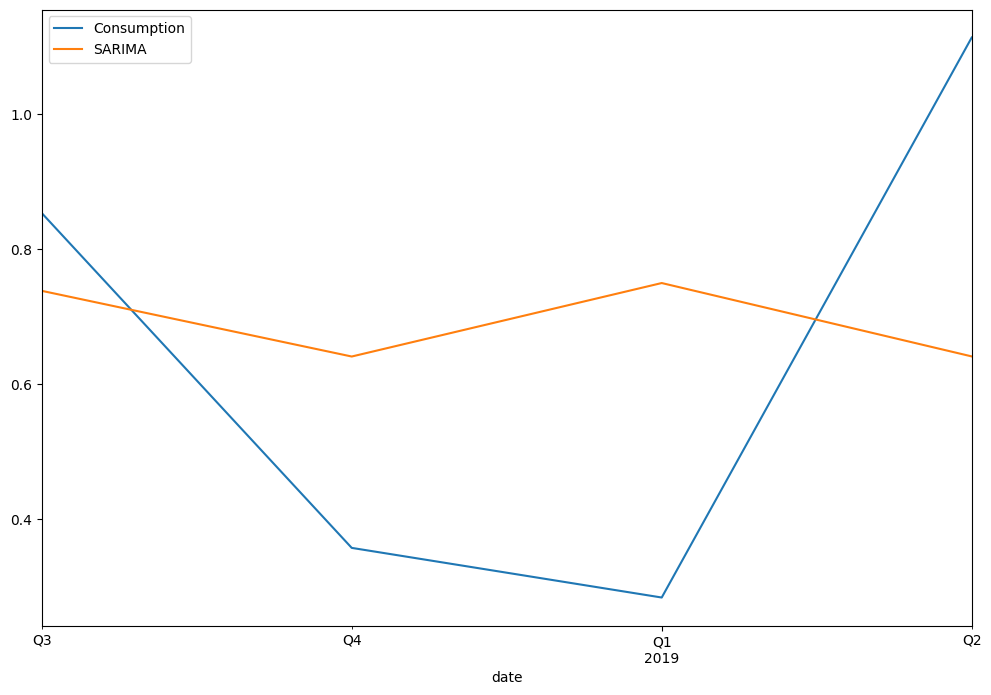

In [27]:
ax=test['Consumption'].plot(legend=True)
consumption_predictions.plot(legend=True)

Plotting the historical data and the forecasted values.

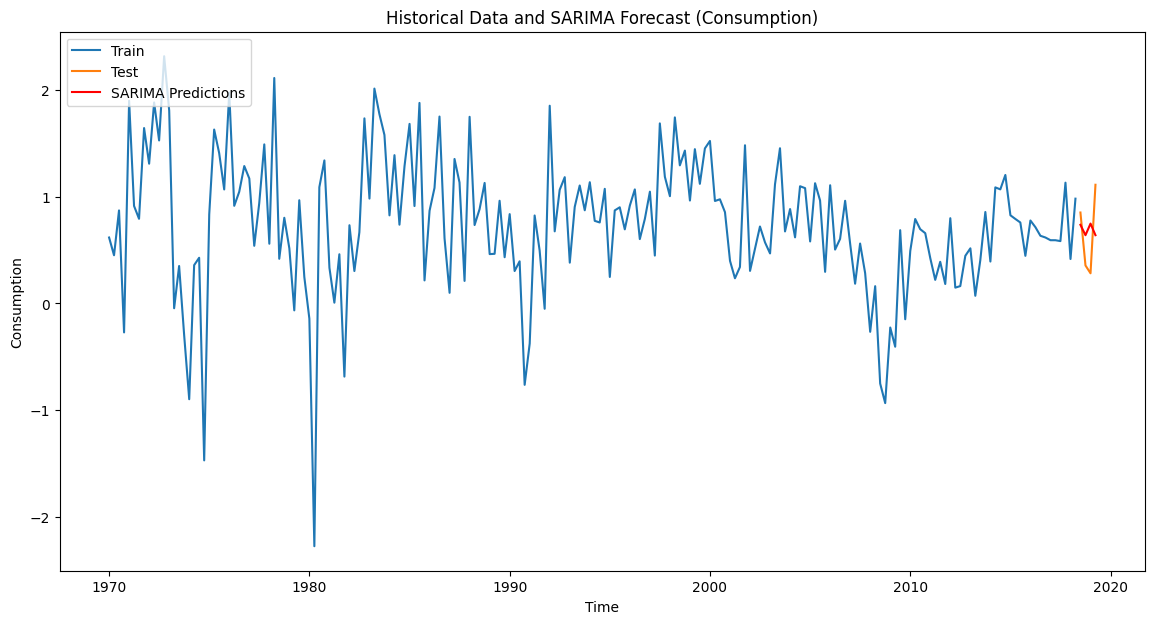

In [28]:
# Plot historical data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Consumption'], label='Train')
plt.plot(test.index, test['Consumption'], label='Test')
plt.plot(consumption_predictions.index, consumption_predictions, label='SARIMA Predictions', color='red')
plt.legend(loc='upper left')
plt.title('Historical Data and SARIMA Forecast (Consumption)')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.show()

In [29]:
mean_absolute_percentage_error(test['Consumption'], consumption_predictions)

0.7512887021069024

In [96]:
mean_squared_error(test['Consumption'], consumption_predictions)

0.1338014394788501

In [30]:
results_Income = SARIMAX(train['Income'], order=(2,0,0), seasonal_order=(0,0,0,4)).fit()
results_Income

In [31]:
start=len(train)
end=start+len(test)-1
income_predictions=results_consumption.predict(start,end).rename('SARIMA')

<Axes: xlabel='date'>

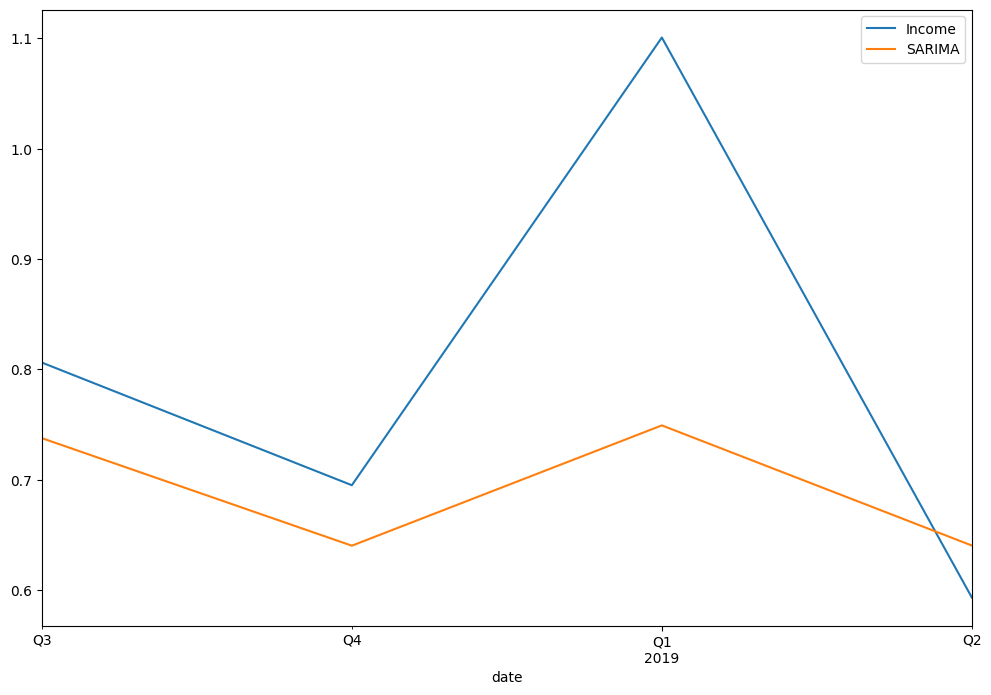

In [32]:
ax=test['Income'].plot(legend=True)
income_predictions.plot(legend=True)

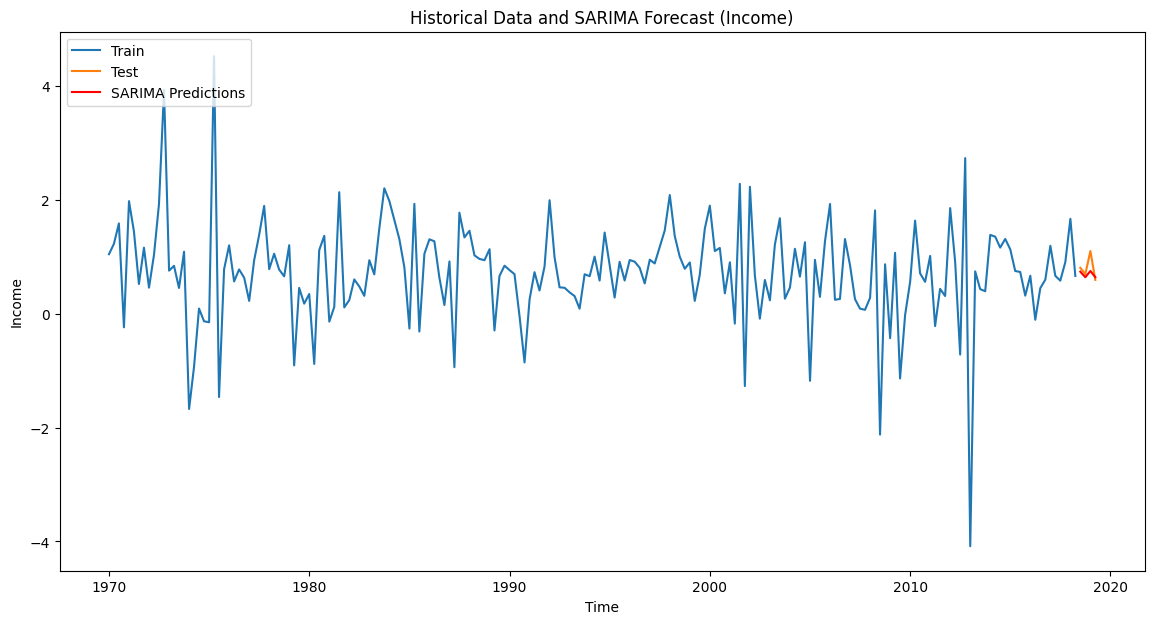

In [33]:
# Plot historical data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Income'], label='Train')
plt.plot(test.index, test['Income'], label='Test')
plt.plot(income_predictions.index, income_predictions, label='SARIMA Predictions', color='red')
plt.legend(loc='upper left')
plt.title('Historical Data and SARIMA Forecast (Income)')
plt.xlabel('Time')
plt.ylabel('Income')
plt.show()

In [34]:
mean_absolute_percentage_error(test['Income'], income_predictions)

0.14059627676548414

In [97]:
mean_squared_error(test['Income'], income_predictions)

0.033349204033760696

In [35]:
results_production = SARIMAX(train['Production'], order=(1,0,0), seasonal_order=(2,0,1,4)).fit()
results_production

In [36]:
start=len(train)
end=start+len(test)-1
production_predictions=results_production.predict(start,end).rename('SARIMA')

<Axes: xlabel='date'>

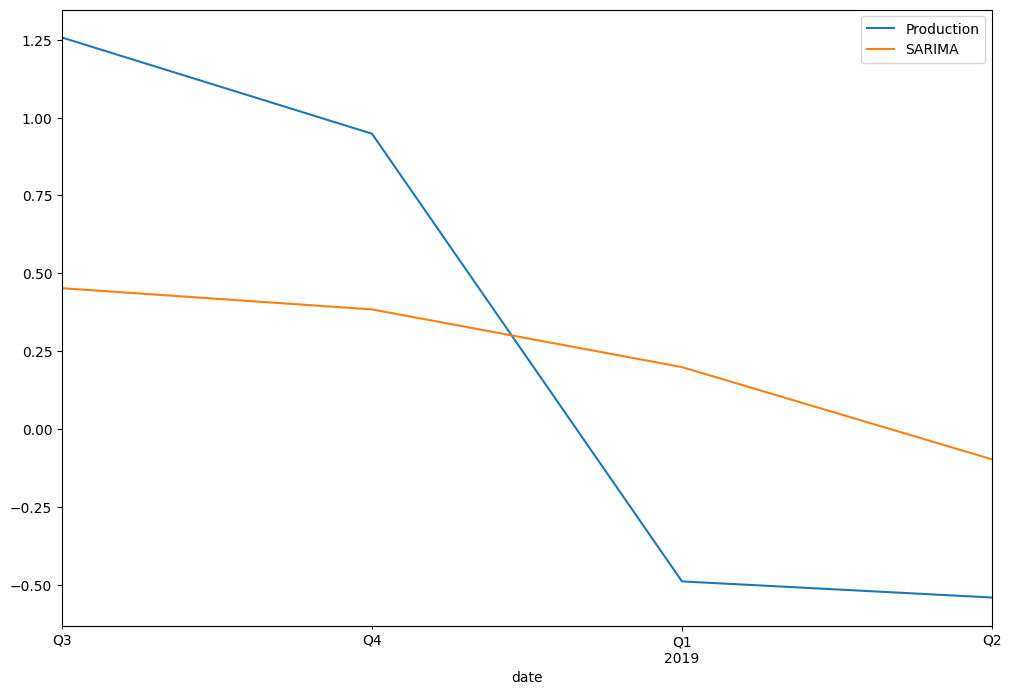

In [37]:
ax=test['Production'].plot(legend=True)
production_predictions.plot(legend=True)

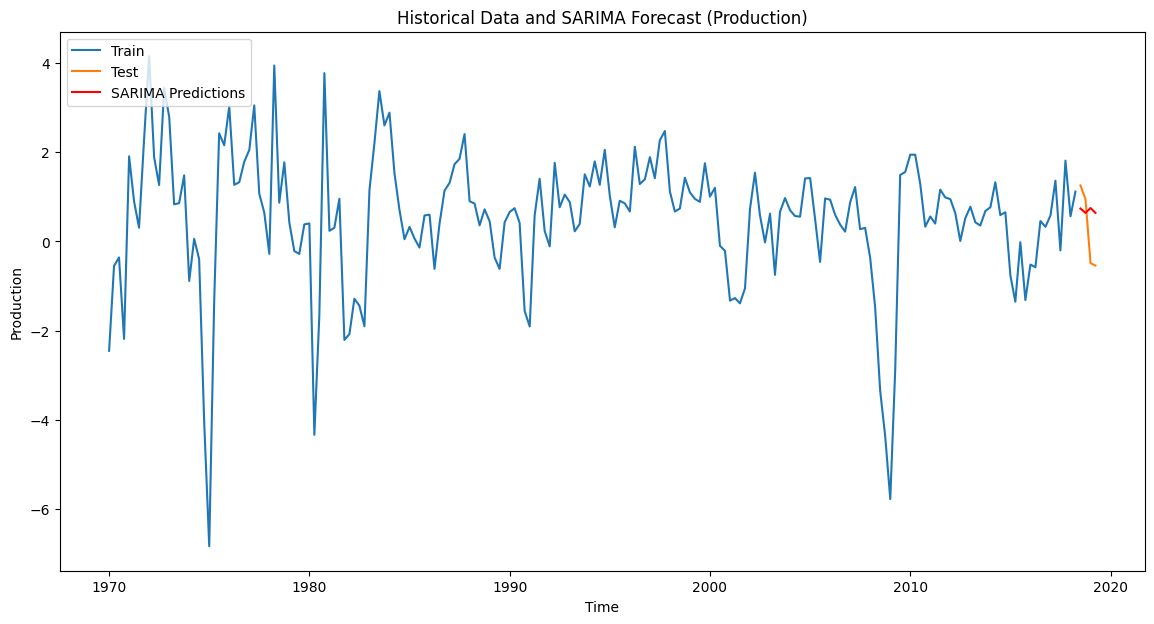

In [38]:
# Plot historical data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Production'], label='Train')
plt.plot(test.index, test['Production'], label='Test')
plt.plot(income_predictions.index, income_predictions, label='SARIMA Predictions', color='red')
plt.legend(loc='upper left')
plt.title('Historical Data and SARIMA Forecast (Production)')
plt.xlabel('Time')
plt.ylabel('Production')
plt.show()

In [39]:
mean_absolute_percentage_error(test['Production'], production_predictions)

0.8660157638057591

In [40]:
results_savings = SARIMAX(train['Savings'], order=(1,0,0), seasonal_order=(2,0,2,4)).fit()
results_savings

C:\Users\NAUM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
start=len(train)
end=start+len(test)-1
savings_predictions=results_savings.predict(start,end).rename('SARIMA')

<Axes: xlabel='date'>

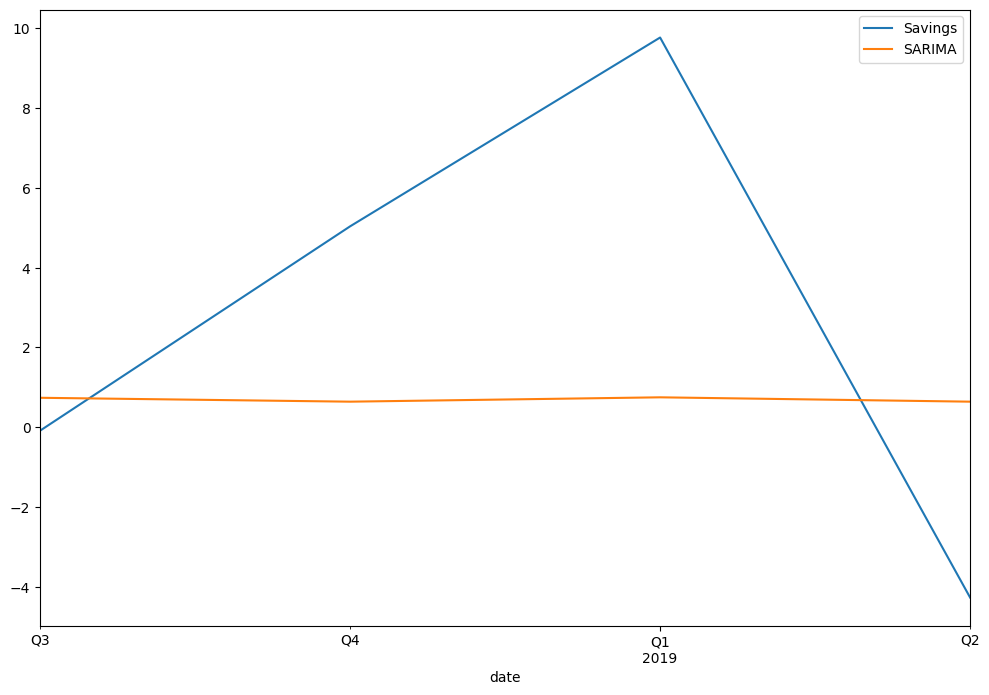

In [42]:
ax=test['Savings'].plot(legend=True)
income_predictions.plot(legend=True)

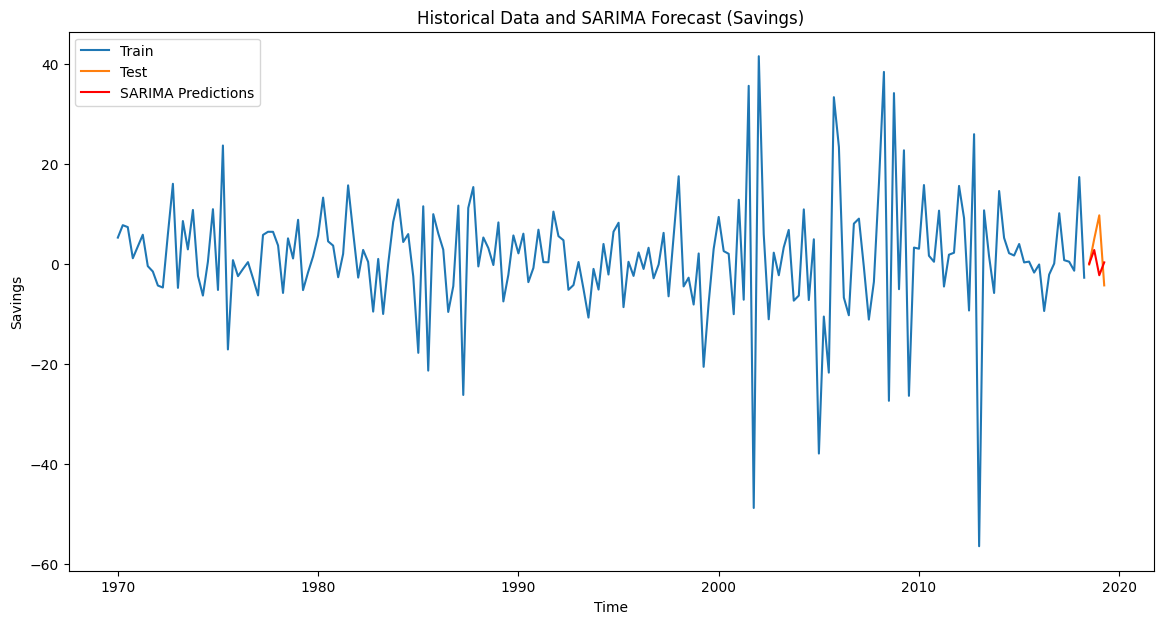

In [43]:
# Plot historical data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Savings'], label='Train')
plt.plot(test.index, test['Savings'], label='Test')
plt.plot(savings_predictions.index, savings_predictions, label='SARIMA Predictions', color='red')
plt.legend(loc='upper left')
plt.title('Historical Data and SARIMA Forecast (Savings)')
plt.xlabel('Time')
plt.ylabel('Savings')
plt.show()

In [44]:
mean_absolute_percentage_error(test['Savings'], savings_predictions)

1.1424311396209226

In [46]:
results_unemployment = SARIMAX(train['Unemployment'], order=(0,0,3), seasonal_order=(0,0,2,4)).fit()
results_unemployment

In [47]:
start=len(train)
end=start+len(test)-1
unemployment_predictions=results_unemployment.predict(start,end).rename('SARIMA')

<Axes: xlabel='date'>

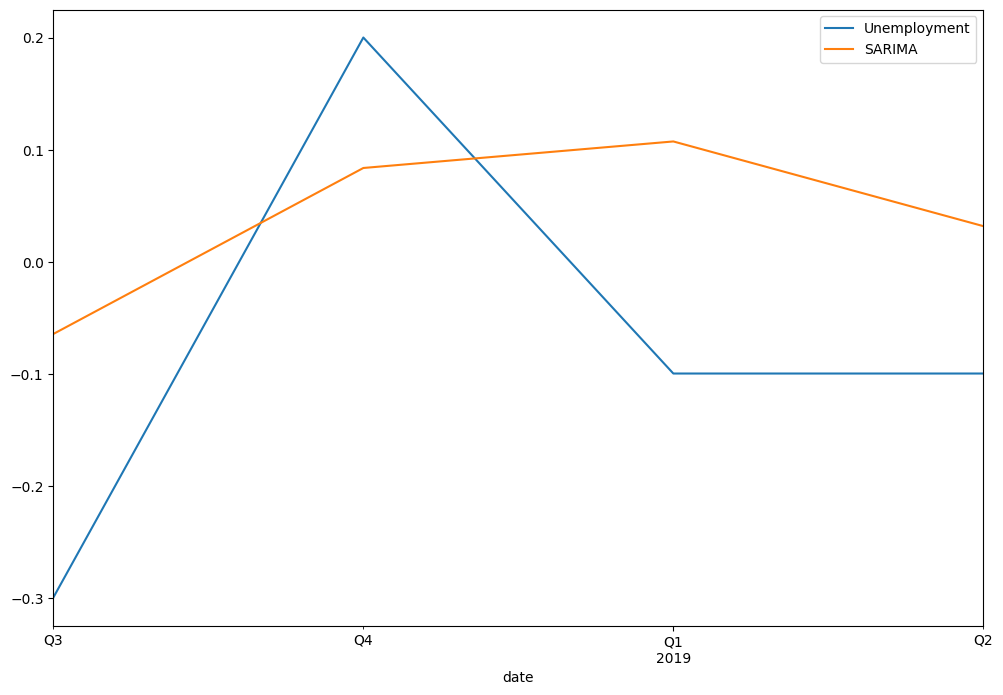

In [48]:
ax=test['Unemployment'].plot(legend=True)
unemployment_predictions.plot(legend=True)

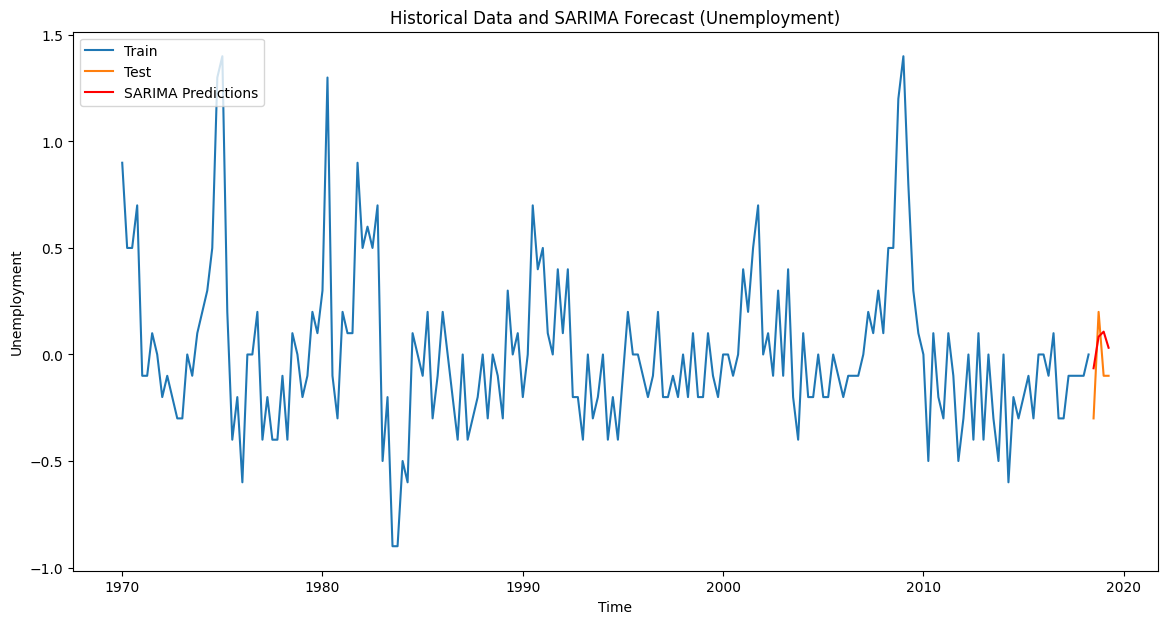

In [49]:
# Plot historical data and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Unemployment'], label='Train')
plt.plot(test.index, test['Unemployment'], label='Test')
plt.plot(unemployment_predictions.index, unemployment_predictions, label='SARIMA Predictions', color='red')
plt.legend(loc='upper left')
plt.title('Historical Data and SARIMA Forecast (Unemployment)')
plt.xlabel('Time')
plt.ylabel('Unemployment')
plt.show()

In [50]:
mean_absolute_percentage_error(test['Unemployment'], unemployment_predictions)

1.1886831488472167

In [51]:
modelExog=SARIMAX(train['Consumption'],exog=train['Income'],order=(1,0,3),seasonal_order=(0,0,2,4))
resultsExog=modelExog.fit()
resultsExog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                            Consumption   No. Observations:                  194
Model:             SARIMAX(1, 0, 3)x(0, 0, [1, 2], 4)   Log Likelihood                -166.274
Date:                                Wed, 19 Jun 2024   AIC                            348.548
Time:                                        11:27:18   BIC                            374.691
Sample:                                    01-01-1970   HQIC                           359.134
                                         - 04-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Income         0.1921      0.035      5.506      0.000       0.124       0.260
ar.L1          0.9750      0.018     52.810      0.000       0.939       1.011
ma.L1         -0.8156      0.062    -13.065      0.000      -0.938      -0.693
ma.L2          0.1828      0.077      2.367      0.018       0.031       0.334
ma.L3         -0.0411      0.078     -0.525      0.600      -0.195       0.113
ma.S.L4       -0.0778      0.103     -0.756      0.450      -0.279       0.124
ma.S.L8       -0.1292      0.081     -1.598      0.110      -0.288       0.029
sigma2         0.3227      0.026     12.239      0.000       0.271       0.374
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                24.19
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
predictionsExog=resultsExog.predict(start=start,end=end,exog=test['Income'],dynamic=False).rename('SARIMAX')

<Axes: xlabel='date'>

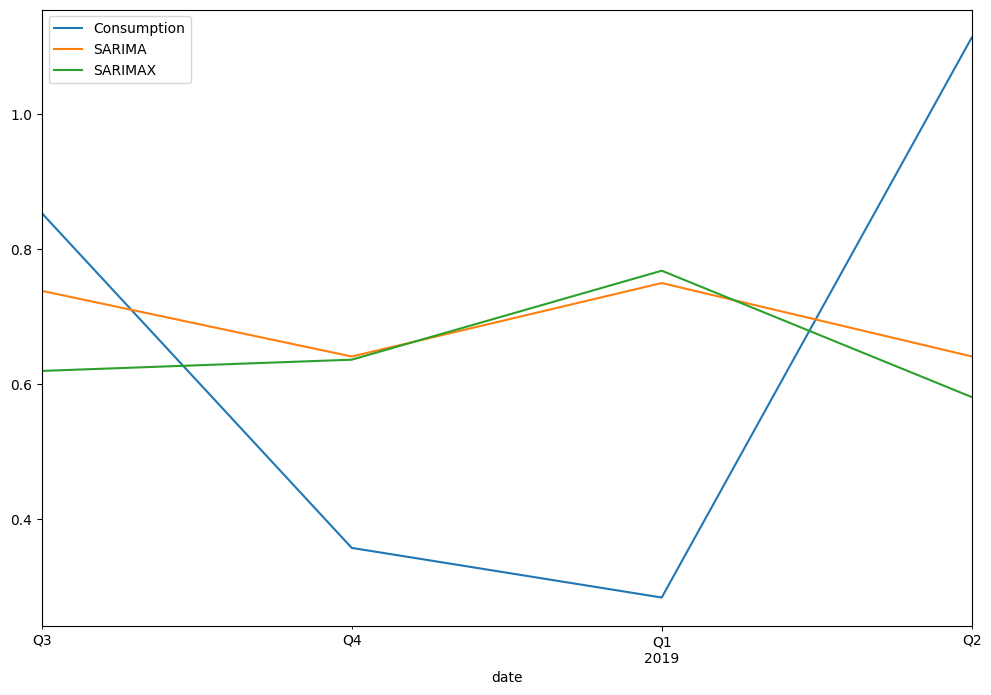

In [53]:
ax=test['Consumption'].plot(legend=True)
consumption_predictions.plot(legend=True)
predictionsExog.plot(legend=True)

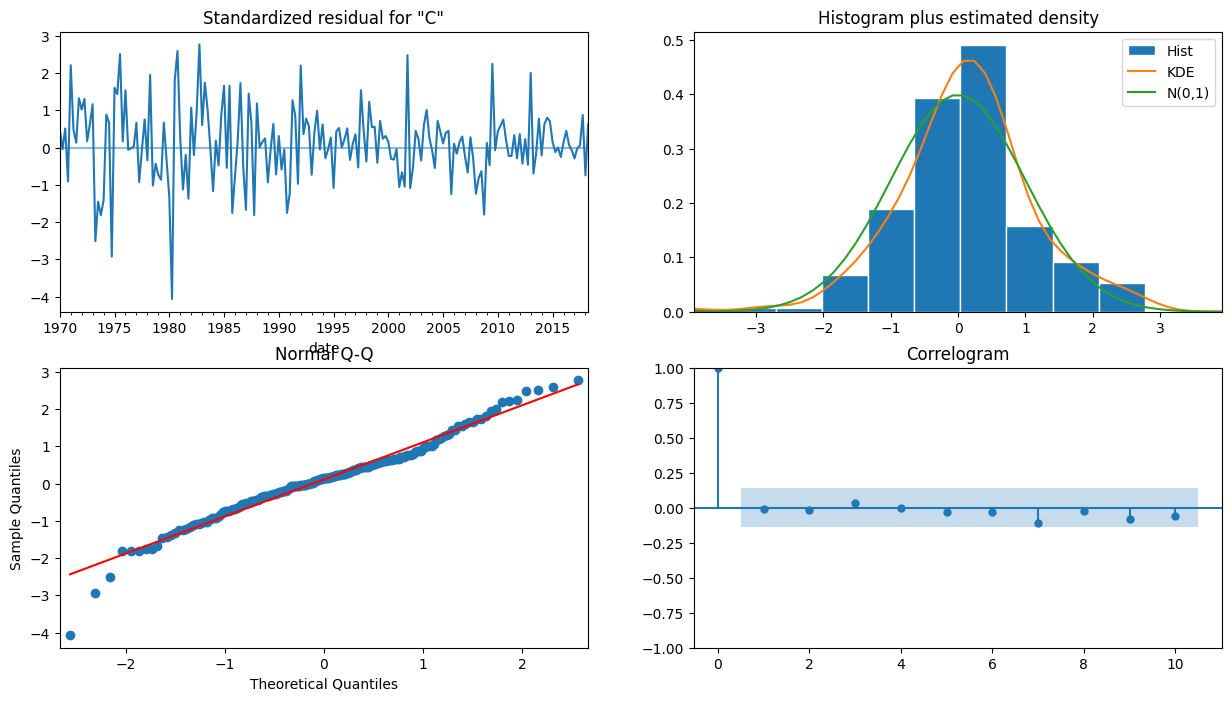

In [54]:
resultsExog.plot_diagnostics(figsize=(15,8));

 Residuals should be centered around zero and show no obvious patterns or trends, should follow a normal distribution, deviations from this line suggest departures from normality, most spikes lie within the confidence intervals 

In [183]:
mean_absolute_percentage_error(test['Consumption'],predictionsExog)

0.8125064663100917

#### Multivariate Analysis

To capture the relationships between the variables, we can use models designed for multivariate time series data, such as Vector Autoregression (VAR)

In [60]:
from statsmodels.tsa.api  import VAR 

In [61]:
data =df[['Consumption','Income']]
data

,Consumption,Income
date,,
1970-01-01,0.618566,1.044801
1970-04-01,0.451984,1.225647
1970-07-01,0.872872,1.585154
1970-10-01,-0.271848,-0.239545
1971-01-01,1.901345,1.975925
...,...,...
2018-04-01,0.983112,0.661825
2018-07-01,0.853181,0.806271
2018-10-01,0.356512,0.695142


In [62]:
trainVAR=data.iloc[:-4]
testVAR=data.iloc[-4:]

In [63]:
for i in range(1,7):
    modelVAR=VAR(trainVAR)
    resultsVAR=modelVAR.fit(i)
    print('order= ',i)
    print('AIC= ', resultsVAR.aic)
    print('')

order=  1
AIC=  -1.44355774811431

order=  2
AIC=  -1.4427021710347259

order=  3
AIC=  -1.47905868013255

order=  4
AIC=  -1.4929139211167437

order=  5
AIC=  -1.555900188730903

order=  6
AIC=  -1.5281062869097648



The lowest AIC value is at order 2, with an AIC of -1.4427. This suggests that the VAR model with 2 lags provides the best fit for the data according to the AIC criterion.

In [64]:
modelVAR=VAR(trainVAR)
resultsVAR=modelVAR.fit(2)

In [65]:
resultsVAR.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     11:32:39
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.27304
Nobs:                     192.000    HQIC:                  -1.37399
Log likelihood:          -396.373    FPE:                   0.236294
AIC:                     -1.44270    Det(Omega_mle):        0.224452
--------------------------------------------------------------------
Results for equation Consumption
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.367132         0.076925            4.773           0.000
L1.Consumption         0.206161         0.077575            2.658           0.008
L1.Income              0.094267         0.054541  

 - Lagged Consumption at both t-1 and t-2 affects current Consumption positively.
 - Lagged Income at t-2 doesn't have a significant effect on current Consumption.
 - The correlation between Consumption and Income is moderate (0.386869), indicating some level of association between the two variables.


These results suggest that past values of both Consumption and Income are useful in predicting current Consumption levels. 

However, the effect of lagged Income on current Consumption is not statistically significant in this model.

In [66]:
lag_order=resultsVAR.k_ar
lag_order

2

In [67]:
predictedValues=resultsVAR.forecast(data.values[-lag_order:],4)
predictedValues

array([[0.72056006, 0.89645685],
       [0.831206  , 0.69576457],
       [0.75855618, 0.77132263],
       [0.77113176, 0.72418929]])

In [68]:
testValuesConsumption=testVAR['Consumption'].values
testValuesConsumption

array([0.85318135, 0.35651203, 0.28288547, 1.1135167 ])

In [69]:
testValuesIncome=testVAR['Income'].values
testValuesIncome

array([0.80627128, 0.69514222, 1.10075295, 0.5933995 ])

In [93]:
mean_absolute_percentage_error(testValuesConsumption,predictedValues[:,0])

0.8689786792940728

In [94]:
mean_squared_error(testValuesConsumption,predictedValues[:,0])

0.14660321292515896

In [71]:
mean_absolute_percentage_error(testValuesIncome,predictedValues[:,1])

0.1581088304291478

In [95]:
mean_squared_error(testValuesIncome,predictedValues[:,1])

0.03344103350440725

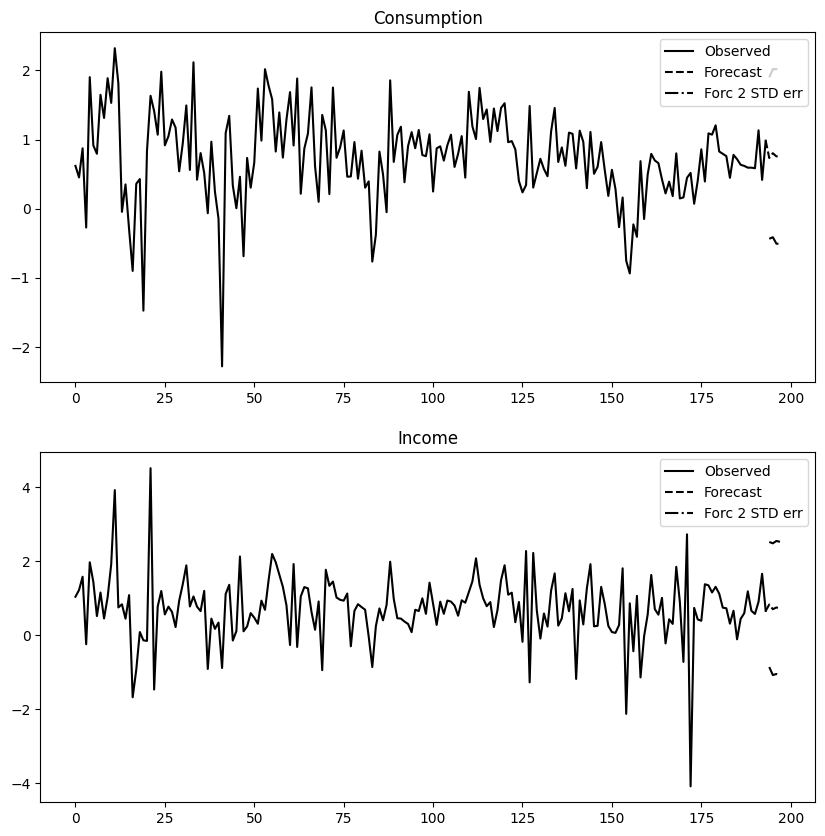

In [72]:
resultsVAR.plot_forecast(4);    # visualize future predictions for 4 periods ahead

In [73]:
# Forecasting
n_forecasts = 4  # Number of steps to forecast
forecast = resultsVAR.forecast(trainVAR.values[-5:], steps=n_forecasts)

forecast_index = pd.date_range(start=trainVAR.index[-1], periods=n_forecasts + 1, freq='Q')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=trainVAR.columns)

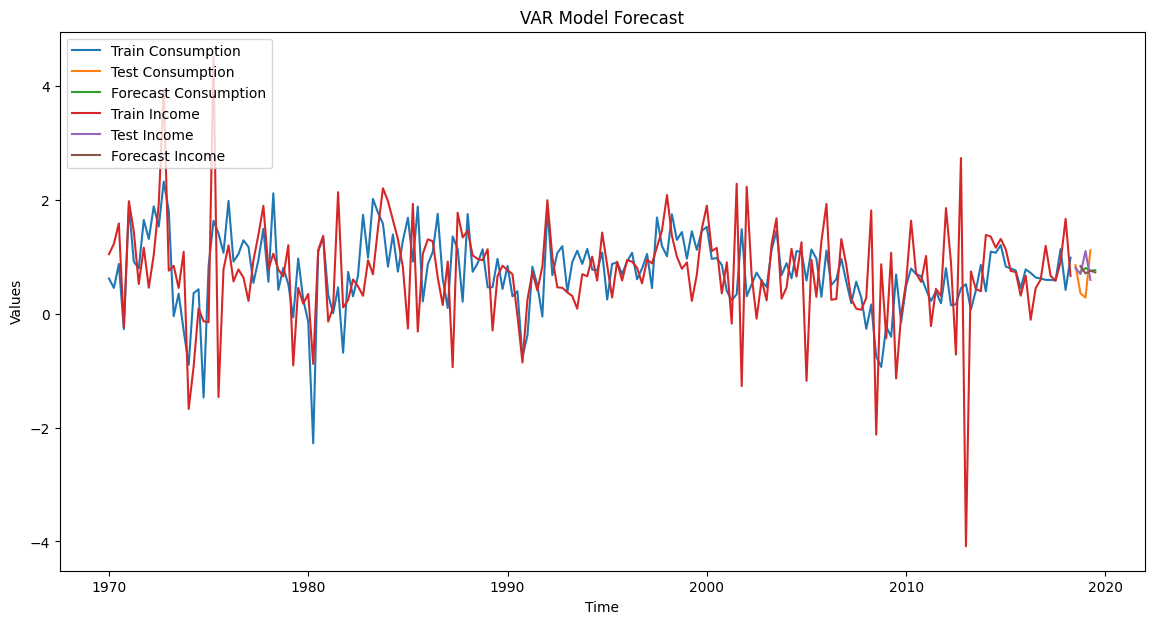

In [200]:
# Plotting the forecast
plt.figure(figsize=(14, 7))
for column in trainVAR.columns:
    plt.plot(trainVAR.index, trainVAR[column], label=f'Train {column}')
    plt.plot(test.index, test[column], label=f'Test {column}')
    plt.plot(forecast_df.index, forecast_df[column], label=f'Forecast {column}')
plt.legend(loc='upper left')
plt.title('VAR Model Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create lagged features for all columns
for lag in range(1, 7):  # Create up to 6 lags for each variable
    data[f'Consumption_lag_{lag}'] = data['Consumption'].shift(lag)
    data[f'Income_lag_{lag}'] = data['Income'].shift(lag)


data = data.dropna().reset_index(drop=True) 

print(data.head())  

   Consumption    Income  Consumption_lag_1  Income_lag_1  Consumption_lag_2  \
0     1.809282  0.755643           2.319558      3.929949           1.529334   
1    -0.045091  0.840392           1.809282      0.755643           2.319558   
2     0.351353  0.451027          -0.045091      0.840392           1.809282   
3    -0.298693  1.088161           0.351353      0.451027          -0.045091   
4    -0.898699 -1.674191          -0.298693      1.088161           0.351353   

   Income_lag_2  Consumption_lag_3  Income_lag_3  Consumption_lag_4  \
0      1.926295           1.885778      1.033389           1.311190   
1      3.929949           1.529334      1.926295           1.885778   
2      0.755643           2.319558      3.929949           1.529334   
3      0.840392           1.809282      0.755643           2.319558   
4      0.451027          -0.045091      0.840392           1.809282   

   Income_lag_4  Consumption_lag_5  Income_lag_5  Consumption_lag_6  \
0      0.456857      

In [86]:
# Define the number of test samples
num_test_samples = 4

# Splitting the data
train = data.iloc[:-num_test_samples]
test = data.iloc[-num_test_samples:]

# Print the number of samples in each set to verify
print(f'Training data samples: {len(train)}, Testing data samples: {len(test)}')

Training data samples: 182, Testing data samples: 4


In [87]:
# Features are the lagged variables, target is what you predict
features = [col for col in data.columns if 'lag' in col]
target = 'Consumption'  # or 'Income' if predicting Income

# Check features and target size before training
print("Features used:", features)
print("Training features shape:", train[features].shape)
print("Training target shape:", train[target].shape)

Features used: ['Consumption_lag_1', 'Income_lag_1', 'Consumption_lag_2', 'Income_lag_2', 'Consumption_lag_3', 'Income_lag_3', 'Consumption_lag_4', 'Income_lag_4', 'Consumption_lag_5', 'Income_lag_5', 'Consumption_lag_6', 'Income_lag_6']
Training features shape: (182, 12)
Training target shape: (182,)


Use lagged features from both Consumption and Income, allowing each model to learn how each variable impacts the other. 

In [91]:
# Define features and targets
features = [col for col in data.columns if 'lag' in col]

# Model for predicting Consumption
target_consumption = 'Consumption'
rf_model_consumption = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_consumption.fit(train[features], train[target_consumption])
predictions_consumption = rf_model_consumption.predict(test[features])
mse_consumption = mean_squared_error(test[target_consumption], predictions_consumption)
print(f'MSE for Consumption predictions: {mse_consumption}')

# Model for predicting Income
target_income = 'Income'
rf_model_income = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_income.fit(train[features], train[target_income])
predictions_income = rf_model_income.predict(test[features])
mse_income = mean_squared_error(test[target_income], predictions_income)
print(f'MSE for Income predictions: {mse_income}')

MSE for Consumption predictions: 0.19726393528225122
MSE for Income predictions: 0.13615778586937635


In [99]:
# Define features and targets
features = [col for col in data.columns if 'lag' in col]

# Model for predicting Consumption
target_consumption = 'Consumption'
rf_model_consumption = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_consumption.fit(train[features], train[target_consumption])
predictions_consumption = rf_model_consumption.predict(test[features])
mse_consumption = mean_absolute_percentage_error(test[target_consumption], predictions_consumption)
print(f'MAPE for Consumption predictions: {mse_consumption}')

# Model for predicting Income
target_income = 'Income'
rf_model_income = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_income.fit(train[features], train[target_income])
predictions_income = rf_model_income.predict(test[features])
mse_income = mean_absolute_percentage_error(test[target_income], predictions_income)
print(f'MAPE for Income predictions: {mse_income}')

MAPE for Consumption predictions: 0.798349015573651
MAPE for Income predictions: 0.3423785351600742


Conclusion:

The time series analysis was conducted using 3 models: ARIMA, VAR and Random Forest Regressor.

Both MAPE and MSE error metrics were computed to compare the models

Based on the values, we can conclude that ARIMA model, a method which was applied to separate variable, performed better than the other models

VAR model performed better than the Random Forest regressor, which was the worst.